<a href="https://colab.research.google.com/github/leduytan0706/student-depression-prediction/blob/main/BaiTapCaNhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Depression Dataset - Tập dữ liệu về khả năng trầm cảm của người học

## 1. Tìm hiểu, nghiên cứu sơ bộ về dữ liệu

**Tổng quan**

Bộ dữ liệu này chứa thông tin toàn diện về sức khỏe tâm thần của học sinh và các yếu tố liên quan. Nó được thiết kế để phân tích các xu hướng và yếu tố dự báo trầm cảm ở học sinh. Dữ liệu bao gồm thông tin chi tiết về nhân khẩu học, áp lực học tập và công việc, thói quen lối sống và các chỉ số sức khỏe tâm thần cụ thể. Các nhà nghiên cứu có thể sử dụng bộ dữ liệu này để xác định các yếu tố rủi ro gây trầm cảm và phát triển các chiến lược can thiệp sớm, đồng thời đảm bảo xử lý thông tin nhạy cảm một cách có đạo đức.

**Giải thích các thuộc tính**

- **id**: Mã định danh duy nhất được gán cho mỗi hồ sơ sinh viên trong tập dữ liệu.
- **Gender**: Giới tính của học sinh (ví dụ: Nam, Nữ, Khác). Điều này giúp phân tích xu hướng sức khỏe tâm thần theo giới tính.
- **Age**: Độ tuổi của học sinh tính theo năm.
- **City**: Thành phố hoặc khu vực nơi sinh viên cư trú, cung cấp bối cảnh địa lý cho việc phân tích.
- **Profession**: Lĩnh vực làm việc hoặc học tập của sinh viên, có thể cung cấp thông tin chi tiết về các yếu tố gây căng thẳng trong nghề nghiệp hoặc học tập.
- **Academic Pressure**: Một biện pháp cho biết mức độ áp lực mà học sinh phải đối mặt trong môi trường học thuật. Điều này có thể bao gồm căng thẳng từ các kỳ thi, bài tập và kỳ vọng học tập chung.
- **Work Pressure**: Một thước đo áp lực liên quan đến công việc hoặc trách nhiệm nghề nghiệp, có liên quan đến sinh viên đi làm thêm trong thời gian học.
- **CGPA**: Điểm trung bình tích lũy của sinh viên, phản ánh thành tích học tập chung.
- **Study Satisfaction**: Một chỉ số cho thấy mức độ hài lòng của sinh viên với việc học của mình, có thể tương quan với sức khỏe tinh thần.
- **Job Satisfaction**: Đo lường mức độ hài lòng của sinh viên với công việc hoặc môi trường làm việc, nếu có.
- **Sleep Duration**: Số giờ ngủ trung bình của học sinh mỗi ngày, đây là yếu tố quan trọng đối với sức khỏe tinh thần.
- **Dietary Habits**: Đánh giá chế độ ăn uống và thói quen dinh dưỡng của học sinh, có khả năng ảnh hưởng đến sức khỏe tổng thể và tâm trạng.
- **Degree**: Bằng cấp hoặc chương trình học mà sinh viên đang theo đuổi.
- **Have you ever had suicidal thoughts ?**: Chỉ số nhị phân (Có/Không) phản ánh liệu học sinh có từng có ý định tự tử hay không.
- **Work/Study Hours**: Số giờ trung bình mỗi ngày mà sinh viên dành cho công việc hoặc học tập, điều này có thể ảnh hưởng đến mức độ căng thẳng.
- **Financial Stress**: Đo lường mức độ căng thẳng do lo lắng về tài chính, có thể ảnh hưởng đến sức khỏe tâm thần.
- **Family History of Mental Illness**: Cho biết liệu có tiền sử gia đình mắc bệnh tâm thần hay không (Có/Không), đây có thể là yếu tố quan trọng ảnh hưởng đến khuynh hướng sức khỏe tâm thần.
- **Depression**: Biến mục tiêu cho biết liệu học sinh có đang bị trầm cảm hay không (Có/Không). Đây là trọng tâm chính của phân tích.


**Import các thư viện cần thiết**

In [ ]:
!pip install category_encoders

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import re
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

**Load bộ dữ liệu**

In [ ]:
data = pd.read_csv("./student_depression_dataset.csv")



**Hiển thị 10 mẫu đầu tiên của dataset**

In [ ]:
data.head(20)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
5,33,Male,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,'Less than 5 hours',Healthy,PhD,No,4.0,1.0,No,0
6,52,Male,30.0,Thane,Student,3.0,0.0,9.54,4.0,0.0,'7-8 hours',Healthy,BSc,No,1.0,2.0,No,0
7,56,Female,30.0,Chennai,Student,2.0,0.0,8.04,4.0,0.0,'Less than 5 hours',Unhealthy,'Class 12',No,0.0,1.0,Yes,0
8,59,Male,28.0,Nagpur,Student,3.0,0.0,9.79,1.0,0.0,'7-8 hours',Moderate,B.Ed,Yes,12.0,3.0,No,1
9,62,Male,31.0,Nashik,Student,2.0,0.0,8.38,3.0,0.0,'Less than 5 hours',Moderate,LLB,Yes,2.0,5.0,No,1


**Thông tin về bộ dữ liệu (kiểu dữ liệu các thuộc tính, số lượng, ...)**

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

**Số lượng mẫu và thuộc tính**

In [ ]:
data.shape

(27901, 18)

**Phân tích mô tả (Descriptive Analysis) về bộ dữ liệu**

In [ ]:
data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


## 2. Trực quan hóa dữ liệu

**Kiểm tra các cột thiếu dữ liệu**

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

data.replace('?', np.nan, inplace=True)

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [ ]:
# Xử lý missing value: điền trung bình cho toàn bộ các cột
for feature in data.columns:
    data[feature].fillna(
        data[feature].mode()[0],
        inplace=True
    )

<ipython-input-729-beeee045520e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[feature].fillna(
<ipython-input-729-beeee045520e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}

**Thay cột Sleep Duration và Financial Stress thành kiểu Số học (numeric)**

In [ ]:
def extract_hours(s):
    # Find a number (including decimals)
    match = re.search(r"(\d+(\.\d+)?)", str(s))
    return float(match.group(1)) if match else np.nan

data['Sleep Duration'] = data['Sleep Duration'].apply(extract_hours)

print(data[['Sleep Duration']].head())

data['Financial Stress'] = data['Financial Stress'].astype(float)

   Sleep Duration
0             5.0
1             5.0
2             5.0
3             7.0
4             5.0


### 2.1. Kiểm tra phân phối thuộc tính nhãn (output)

<ipython-input-731-8077bd4a1f1f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Depression', data=data, palette="viridis")


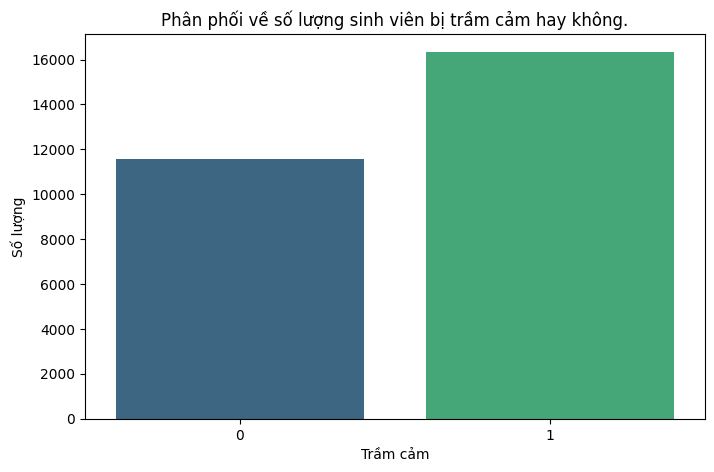

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Depression', data=data, palette="viridis")
plt.title("Phân phối về số lượng sinh viên bị trầm cảm hay không.")
plt.xlabel("Trầm cảm")
plt.ylabel("Số lượng")
plt.show()

### 2.2. Phân phối giá trị đối với các thuộc tính số học (numerical)

In [ ]:
data['Financial Stress'].value_counts()

,count
Financial Stress,
5.0,6718
4.0,5775
3.0,5226
1.0,5121
2.0,5061


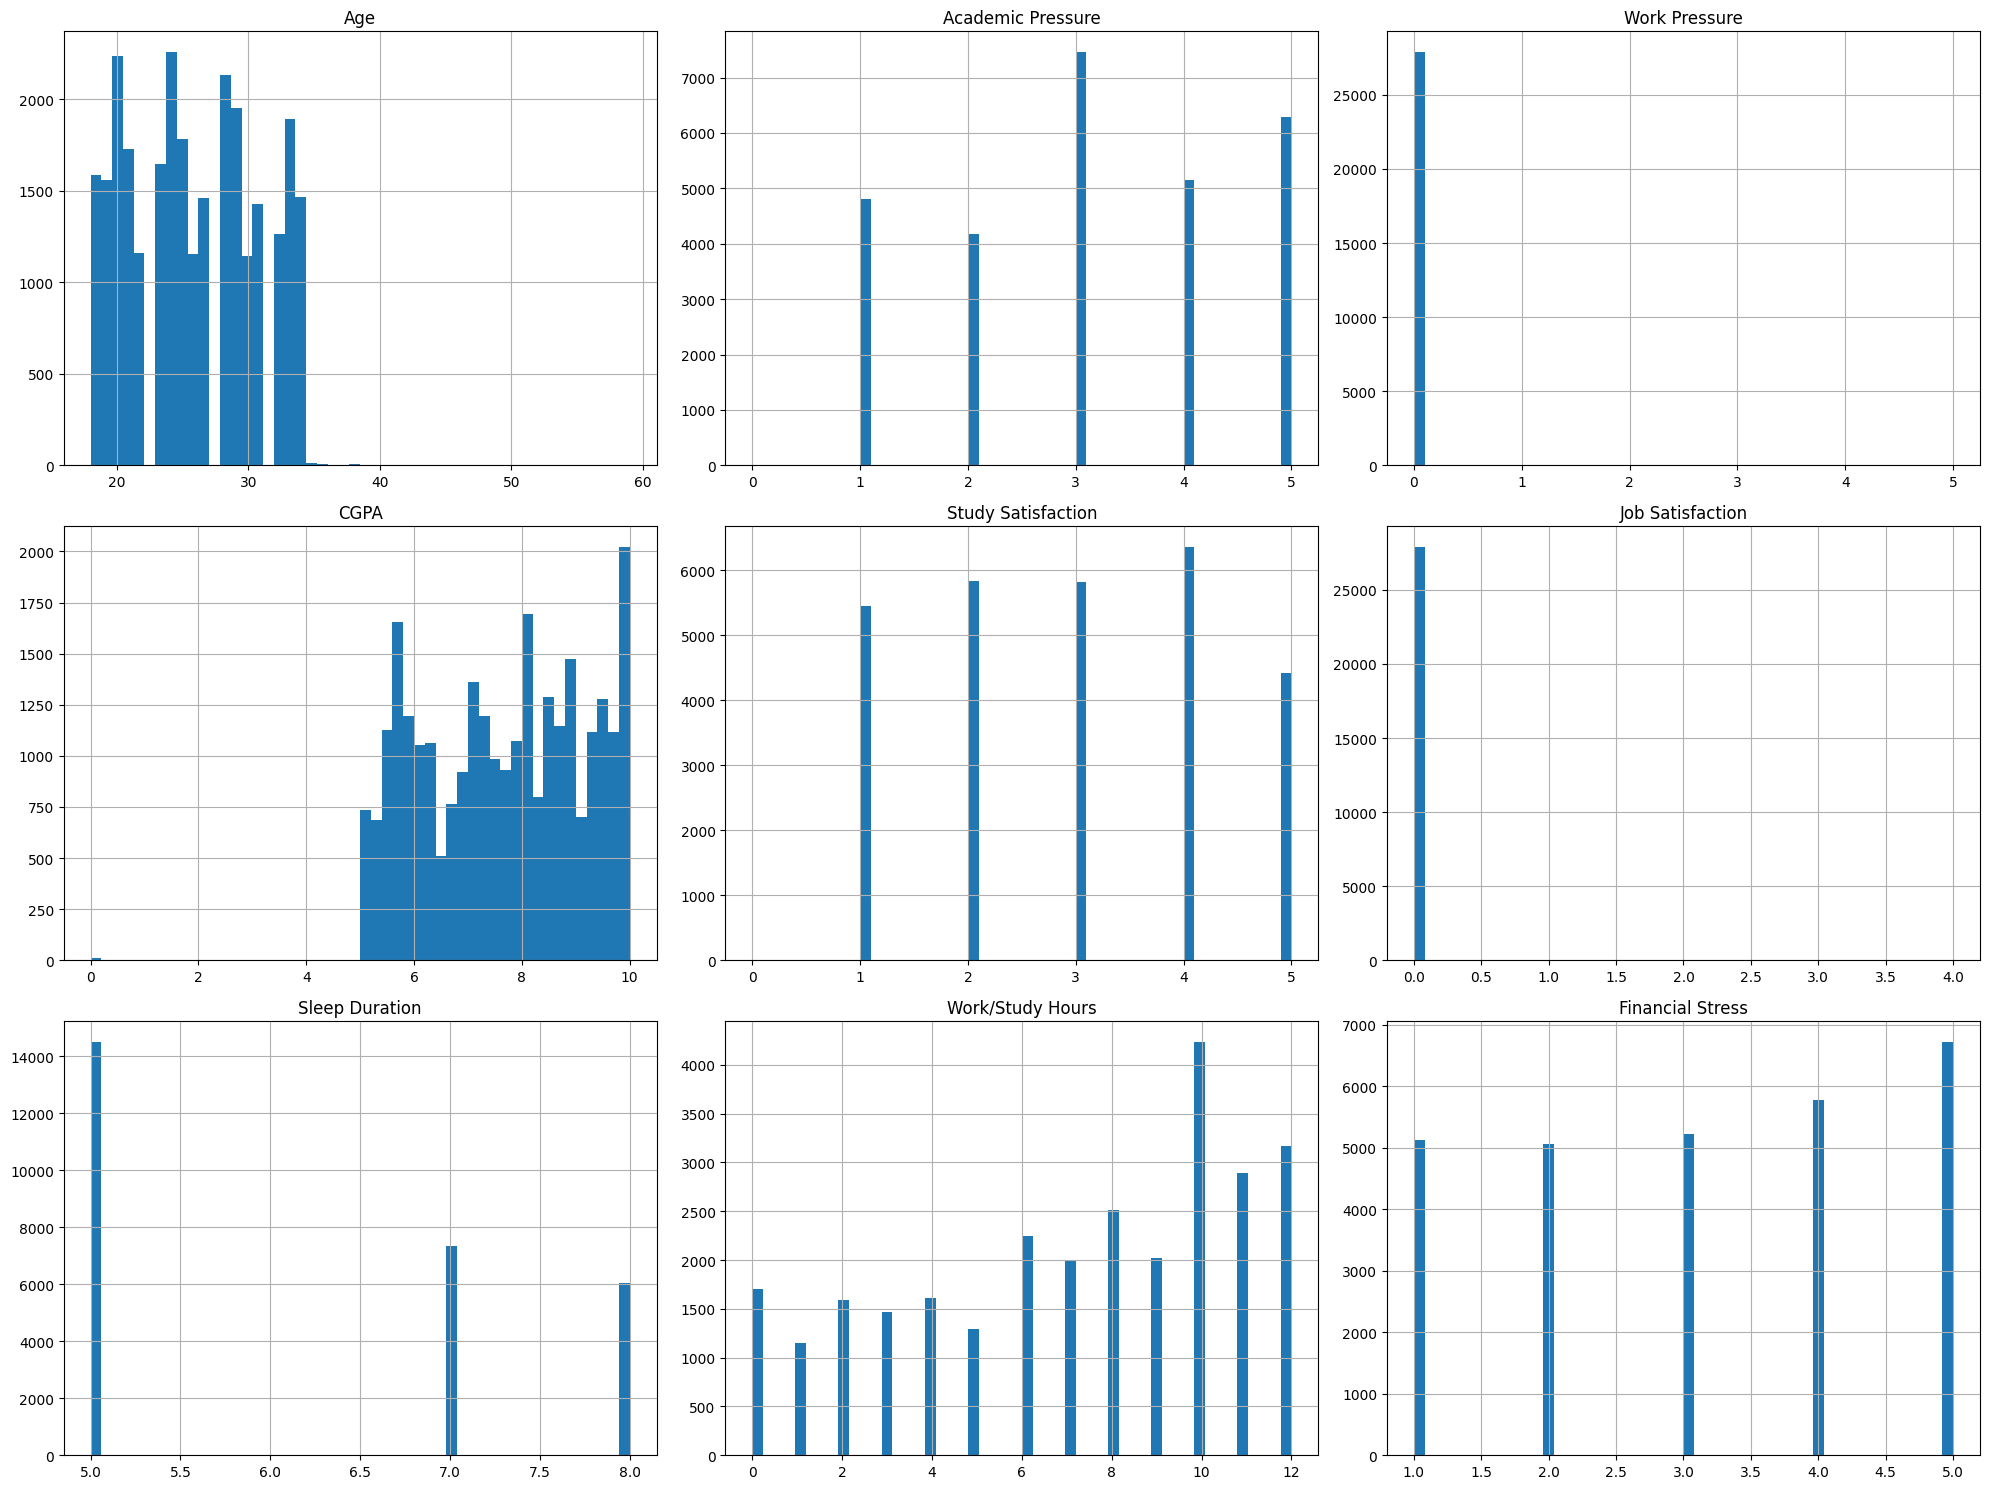

In [ ]:
numerical_feats = ['Age','Academic Pressure','Work Pressure','CGPA','Study Satisfaction','Job Satisfaction','Sleep Duration','Work/Study Hours','Financial Stress']

data[numerical_feats].hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

### 2.3. Phân phối giá trị đối với một số các thuộc tính phân loại (các giá trị cố định)

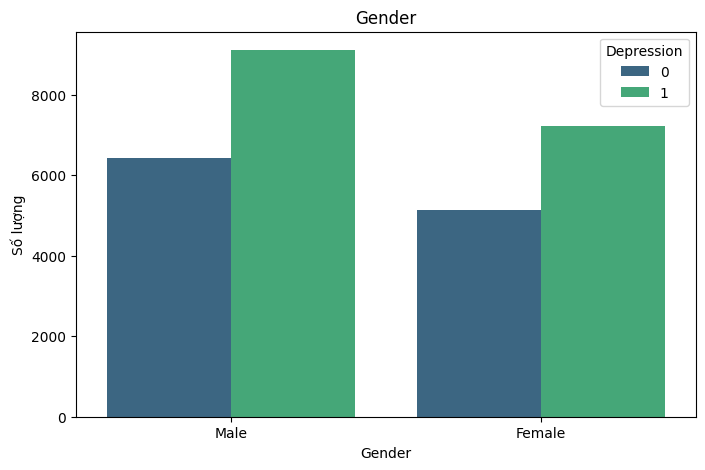

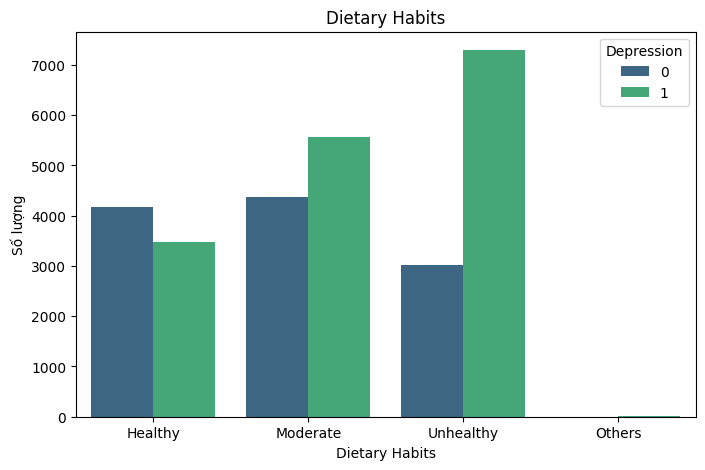

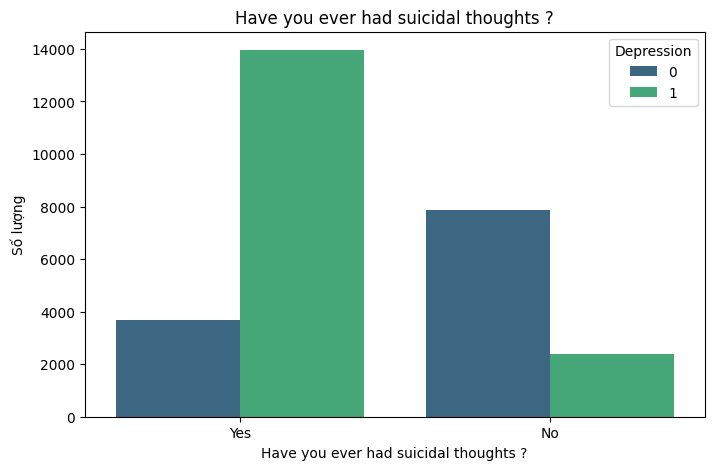

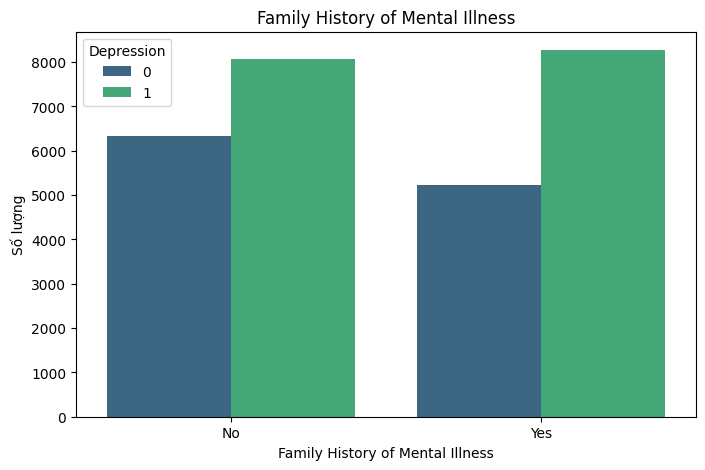

In [ ]:
categorical_feats = ['Gender','Dietary Habits','Have you ever had suicidal thoughts ?','Family History of Mental Illness']
for col in categorical_feats:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, hue='Depression', data=data, palette="viridis")
    plt.title(f"{col}")
    plt.xlabel(col)
    plt.ylabel("Số lượng")
    plt.show()

## 3. Phân tích tương quan

**Mã hóa các thuộc tính phân loại**

In [ ]:
# Sao chép dữ liệu gốc
data_encoded = data.copy()



# Các cột phân loại cần encode
categorical_cols = [
    'Gender',
    'City',
    'Profession',
    'Degree',
    'Dietary Habits',
    'Have you ever had suicidal thoughts ?',
    'Family History of Mental Illness'
]

# Khởi tạo encoder: OrdinalEncoder với xử lý giá trị mới/missing
categorical_encoder = ce.OrdinalEncoder(
    cols=categorical_cols,
    handle_unknown='impute',
    handle_missing='impute'
)

# Fit và transform
data_encoded[data_encoded.columns[:-1]] = categorical_encoder.fit_transform(data_encoded[data_encoded.columns[:-1]])




print(data_encoded.head(10))

   id  Gender   Age  City  Profession  Academic Pressure  Work Pressure  CGPA  \
0   2       1  33.0     1           1                5.0            0.0  8.97   
1   8       2  24.0     2           1                2.0            0.0  5.90   
2  26       1  31.0     3           1                3.0            0.0  7.03   
3  30       2  28.0     4           1                3.0            0.0  5.59   
4  32       2  25.0     5           1                4.0            0.0  8.13   
5  33       1  29.0     6           1                2.0            0.0  5.70   
6  52       1  30.0     7           1                3.0            0.0  9.54   
7  56       2  30.0     8           1                2.0            0.0  8.04   
8  59       1  28.0     9           1                3.0            0.0  9.79   
9  62       1  31.0    10           1                2.0            0.0  8.38   

   Study Satisfaction  Job Satisfaction  Sleep Duration  Dietary Habits  \
0                 2.0            

### 3.1. Ma trận tương quan

In [ ]:
corr_mat = data_encoded.corr()
print(corr_mat)

                                             id    Gender       Age      City  \
id                                     1.000000  0.004785  0.003783  0.005027   
Gender                                 0.004785  1.000000 -0.009071 -0.025444   
Age                                    0.003783 -0.009071  1.000000  0.007979   
City                                   0.005027 -0.025444  0.007979  1.000000   
Profession                             0.008627 -0.004956  0.007154  0.007092   
Academic Pressure                      0.005172  0.022222 -0.075803  0.032402   
Work Pressure                          0.001261 -0.008715  0.002015 -0.004290   
CGPA                                  -0.012324 -0.036040  0.005056  0.012259   
Study Satisfaction                     0.007794  0.015789  0.009235 -0.000579   
Job Satisfaction                       0.001931 -0.007172 -0.000432 -0.008622   
Sleep Duration                        -0.002488 -0.002247 -0.007212  0.002231   
Dietary Habits              

### 3.2. Biểu diễn tương quan bằng heatmap

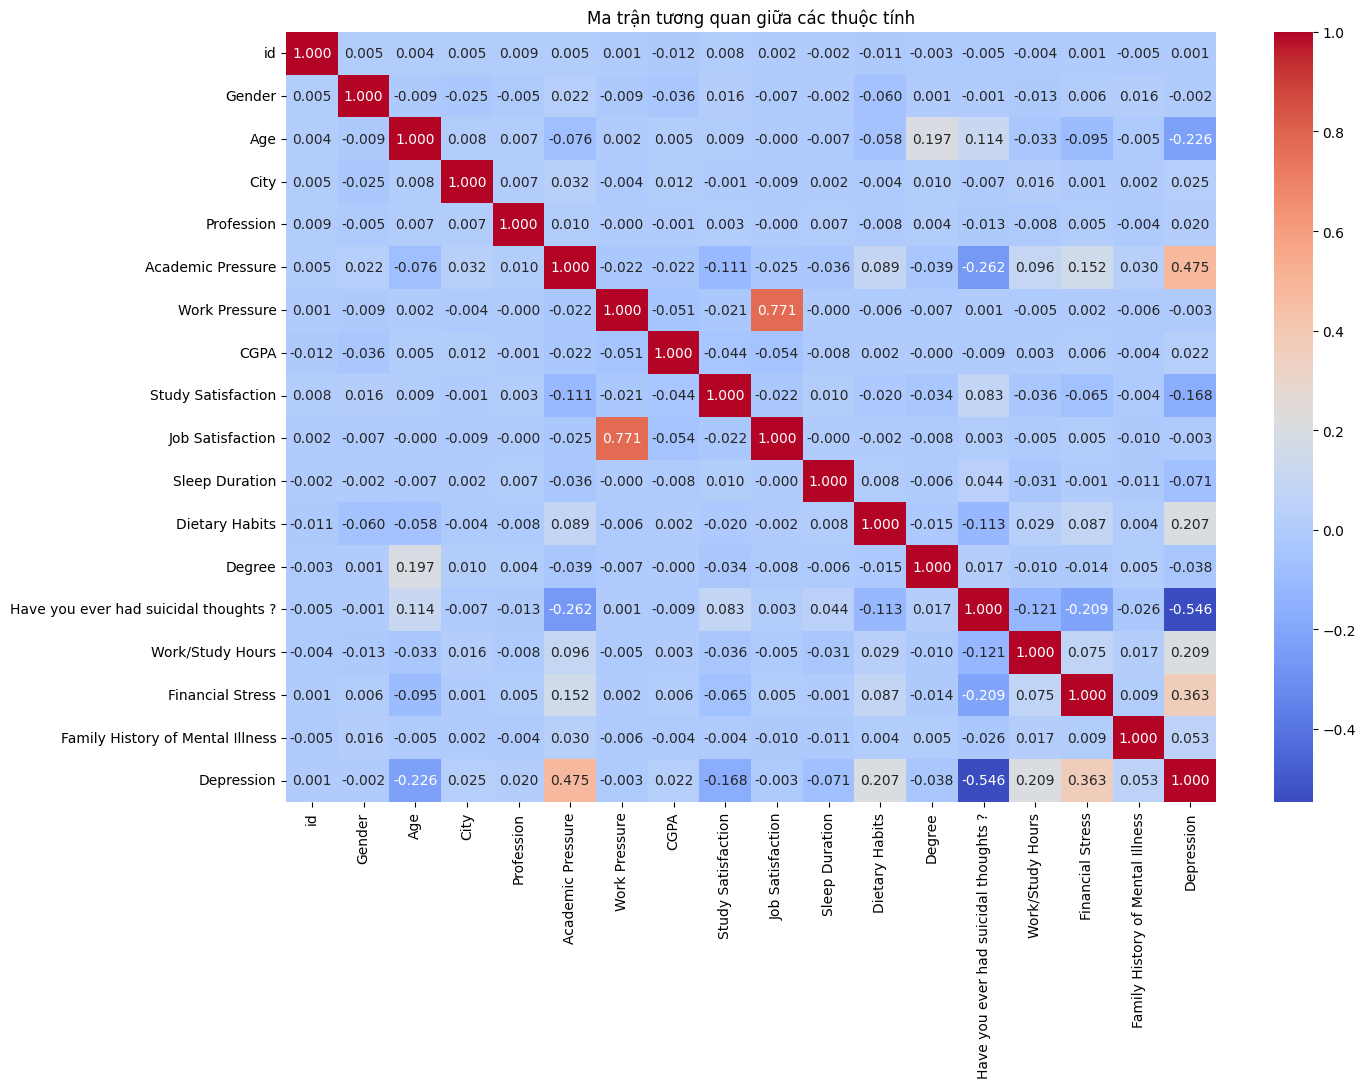

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".3f")
plt.title("Ma trận tương quan giữa các thuộc tính")
plt.show()

## 4. Chuẩn bị dữ liệu để huấn luyện mô hình

### 4.1. Loại bỏ các thuộc tính không quan trọng

Các thuộc tính City, Profession, Dietary Habits và Work/Study Hours có tương quan với thuộc tính nhãn gần như bằng 0

In [ ]:
dropped_cols = ['id','Gender','Profession','Dietary Habits']
data_clean = data.drop(columns=dropped_cols)

In [ ]:
data_clean.head()

,Age,City,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,33.0,Visakhapatnam,5.0,0.0,8.97,2.0,0.0,5.0,B.Pharm,Yes,3.0,1.0,No,1
1,24.0,Bangalore,2.0,0.0,5.90,5.0,0.0,5.0,BSc,No,3.0,2.0,Yes,0
2,31.0,Srinagar,3.0,0.0,7.03,5.0,0.0,5.0,BA,No,9.0,1.0,Yes,0
3,28.0,Varanasi,3.0,0.0,5.59,2.0,0.0,7.0,BCA,Yes,4.0,5.0,Yes,1
4,25.0,Jaipur,4.0,0.0,8.13,3.0,0.0,5.0,M.Tech,Yes,1.0,1.0,No,0


### 4.2. Gộp các thuộc tính lại với nhau

Thuộc tính Academic Pressure và Work Pressure có tương quan cao với nhau. Đồng thời thuộc tính Work Pressure không có tương quan cao với Depression và các giá trị hầu hết bằng 0

In [ ]:
def combined_pressure(row):
    if row['Work Pressure'] == 0.0:
        return row['Academic Pressure']
    elif row['Academic Pressure'] == 0.0:
        return row['Work Pressure']
    else:
        return (row['Work Pressure'] + row['Academic Pressure']) / 2

data_clean['Overall Pressure'] = data_clean.apply(combined_pressure, axis=1)
data_clean.drop(columns=['Work Pressure','Academic Pressure'], inplace=True)


In [ ]:
data_clean.head()

,Age,City,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Overall Pressure
0,33.0,Visakhapatnam,8.97,2.0,0.0,5.0,B.Pharm,Yes,3.0,1.0,No,1,5.0
1,24.0,Bangalore,5.90,5.0,0.0,5.0,BSc,No,3.0,2.0,Yes,0,2.0
2,31.0,Srinagar,7.03,5.0,0.0,5.0,BA,No,9.0,1.0,Yes,0,3.0
3,28.0,Varanasi,5.59,2.0,0.0,7.0,BCA,Yes,4.0,5.0,Yes,1,3.0
4,25.0,Jaipur,8.13,3.0,0.0,5.0,M.Tech,Yes,1.0,1.0,No,0,4.0


Thuộc tính Study Satisfaction và Job Satisfaction có tương quan cao với nhau. Đồng thời thuộc tính Job Satisfaction không có tương quan cao với Depression và hầu hết là giá trị 0

In [ ]:
def combined_satisfaction(row):
    if row['Job Satisfaction'] == 0.0:
        return row['Study Satisfaction']
    elif row['Study Satisfaction'] == 0.0:
        return row['Job Satisfaction']
    else:
        return (row['Study Satisfaction'] + row['Job Satisfaction']) / 2

data_clean['Overall Satisfaction'] = data_clean.apply(combined_satisfaction, axis=1)
data_clean.drop(columns=['Study Satisfaction','Job Satisfaction'], inplace=True)

In [ ]:
data_clean.head()

,Age,City,CGPA,Sleep Duration,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Overall Pressure,Overall Satisfaction
0,33.0,Visakhapatnam,8.97,5.0,B.Pharm,Yes,3.0,1.0,No,1,5.0,2.0
1,24.0,Bangalore,5.90,5.0,BSc,No,3.0,2.0,Yes,0,2.0,5.0
2,31.0,Srinagar,7.03,5.0,BA,No,9.0,1.0,Yes,0,3.0,5.0
3,28.0,Varanasi,5.59,7.0,BCA,Yes,4.0,5.0,Yes,1,3.0,2.0
4,25.0,Jaipur,8.13,5.0,M.Tech,Yes,1.0,1.0,No,0,4.0,3.0


### 4.3. Kiểm tra các giá trị ngoại lai

**Sử dụng boxplot để kiểm tra các giá trị ngoại lai**

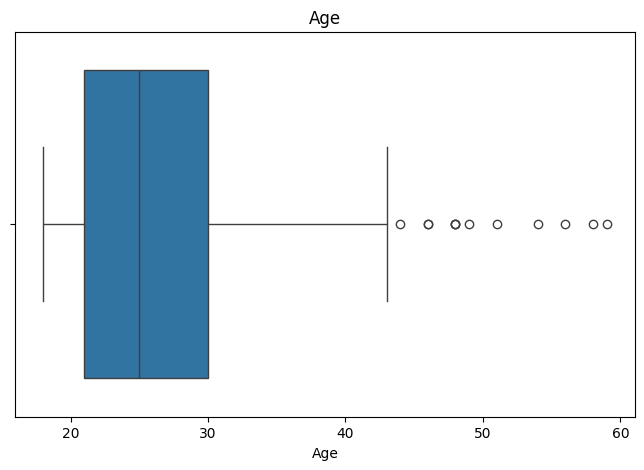

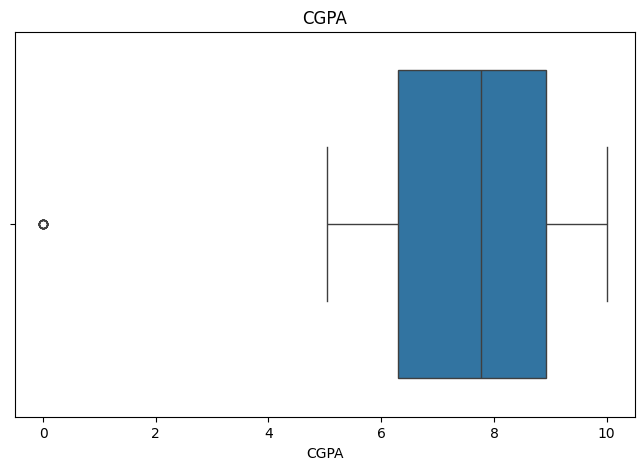

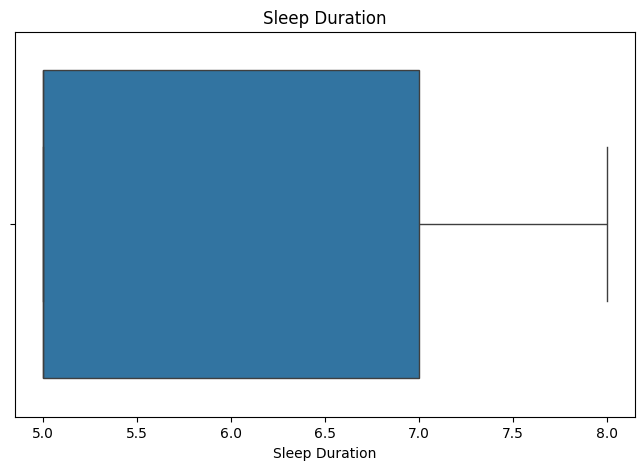

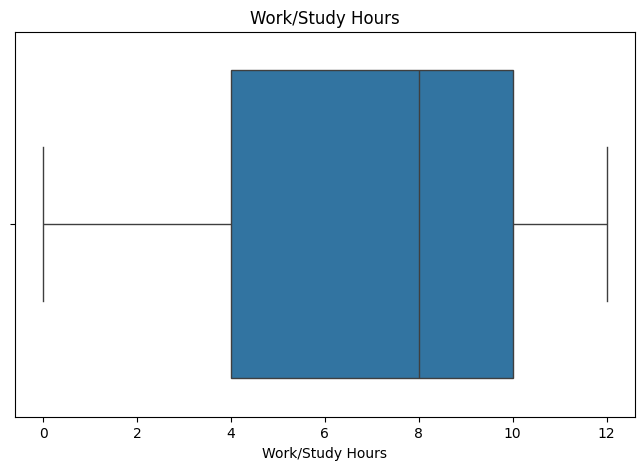

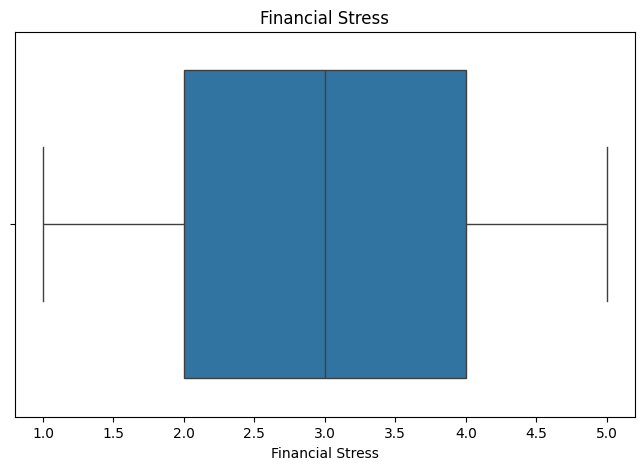

In [ ]:
boxplot_feats = ['Age','CGPA','Sleep Duration','Work/Study Hours','Financial Stress']
for feature in boxplot_feats:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=data_clean, x=feature)
    plt.title(f"{feature}")
    plt.show()

**Chuẩn hóa lại các giá trị**

In [ ]:
scaled_feats = boxplot_feats
print(scaled_feats)
numerical_scaler = StandardScaler()
data_clean[scaled_feats] = numerical_scaler.fit_transform(data_clean[scaled_feats])

['Age', 'CGPA', 'Sleep Duration', 'Work/Study Hours', 'Financial Stress']


## 5. Xây dựng và huấn luyện mô hình

In [ ]:
numerical_feats = ['Age','CGPA','Sleep Duration','Work/Study Hours','Financial Stress','Overall Pressure','Overall Satisfaction']
categorical_feats = ['Have you ever had suicidal thoughts ?', 'Family History of Mental Illness','Depression']

# 1. Điền dữ liệu trống cho cột số học (dùng trung bình)
num_imputer = SimpleImputer(strategy='mean')
data_clean[numerical_feats] = num_imputer.fit_transform(data_clean[numerical_feats])

# 2. Điền dữ liệu trống cho cột phân loại (dùng giá trị phổ biến nhất)
cat_imputer = SimpleImputer(strategy='most_frequent')
data_clean[categorical_feats] = cat_imputer.fit_transform(data_clean[categorical_feats])

**Chia dữ liệu thành tập huấn luyện và tập kiểm tra**

In [ ]:
data_clean.head()

,Age,City,CGPA,Sleep Duration,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Overall Pressure,Overall Satisfaction
0,1.463165,Visakhapatnam,0.893393,-0.925217,B.Pharm,Yes,-1.121213,-1.488873,No,1,5.0,2.0
1,-0.371474,Bangalore,-1.194076,-0.925217,BSc,No,-1.121213,-0.793160,Yes,0,2.0,5.0
2,1.055467,Srinagar,-0.425724,-0.925217,BA,No,0.497095,-1.488873,Yes,0,3.0,5.0
3,0.443921,Varanasi,-1.404862,0.646671,BCA,Yes,-0.851495,1.293981,Yes,1,3.0,2.0
4,-0.167625,Jaipur,0.322229,-0.925217,M.Tech,Yes,-1.660650,-1.488873,No,0,4.0,3.0


In [ ]:
X = data_clean.drop('Depression', axis=1)
y = data_clean['Depression']
y = y.astype(int)
print(X)
print(y)

            Age           City      CGPA  Sleep Duration      Degree  \
0      1.463165  Visakhapatnam  0.893393       -0.925217     B.Pharm   
1     -0.371474      Bangalore -1.194076       -0.925217         BSc   
2      1.055467       Srinagar -0.425724       -0.925217          BA   
3      0.443921       Varanasi -1.404862        0.646671         BCA   
4     -0.167625         Jaipur  0.322229       -0.925217      M.Tech   
...         ...            ...       ...             ...         ...   
27896  0.240073          Surat -1.296069       -0.925217  'Class 12'   
27897  0.240073       Ludhiana  1.185774       -0.925217         MSc   
27898  1.055467      Faridabad -0.711306       -0.925217          MD   
27899 -1.594566       Ludhiana -0.527718       -0.925217  'Class 12'   
27900  0.240073          Patna  1.076981       -0.925217         BCA   

      Have you ever had suicidal thoughts ?  Work/Study Hours  \
0                                       Yes         -1.121213   
1    

**Mã hóa lại giá trị thuộc tính**

In [ ]:
updated_categorical_encoder = ce.OrdinalEncoder(
    cols=['City','Degree','Have you ever had suicidal thoughts ?','Family History of Mental Illness'],
    handle_unknown='impute',
    handle_missing='impute'
)

X = updated_categorical_encoder.fit_transform(X)
X.head()

,Age,City,CGPA,Sleep Duration,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Overall Pressure,Overall Satisfaction
0,1.463165,1,0.893393,-0.925217,1,1,-1.121213,-1.488873,1,5.0,2.0
1,-0.371474,2,-1.194076,-0.925217,2,2,-1.121213,-0.793160,2,2.0,5.0
2,1.055467,3,-0.425724,-0.925217,3,2,0.497095,-1.488873,2,3.0,5.0
3,0.443921,4,-1.404862,0.646671,4,1,-0.851495,1.293981,2,3.0,2.0
4,-0.167625,5,0.322229,-0.925217,5,1,-1.660650,-1.488873,1,4.0,3.0


**Chia bộ dữ liệu thành các tập huấn luyện (train_dataset) và tập kiểm tra (test_dataset)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5.1. Mô hình Logistic Regression

**Huấn luyện mô hình**

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_logistic_pred = logistic_model.predict(X_test)
print("Báo cáo kết quả phân loại bằng Logistic Regression dựa trên tập kiểm tra:")
print(classification_report(y_test, y_logistic_pred))

Báo cáo kết quả phân loại bằng Logistic Regression dựa trên tập kiểm tra:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      2343
           1       0.85      0.87      0.86      3238

    accuracy                           0.83      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.83      0.83      0.83      5581



**So sánh phân loại một số dữ liệu trong tập kiểm tra (test data)**

In [ ]:
result_logistic_data = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_logistic_pred
})

# Hiển thị 15 dòng đầu tiên để kiểm tra
print(result_logistic_data.head(15))

       Actual  Predicted
19981       0          0
16551       0          0
7640        0          0
21266       1          1
15759       1          0
27146       1          1
24868       1          1
26237       1          1
7260        0          0
19527       1          1
21394       0          0
27727       1          1
27349       1          1
9443        1          1
13520       0          0


**Ma trận nhầm lẫn**

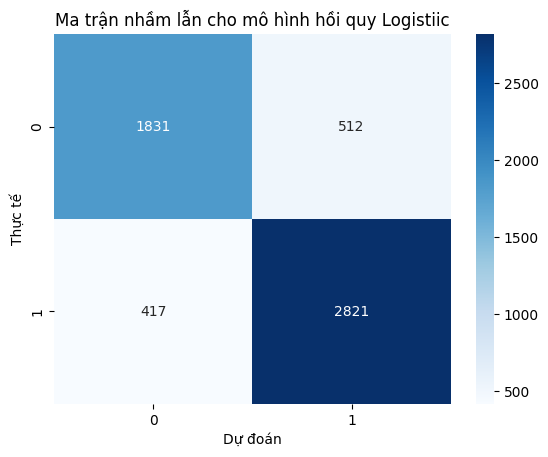

In [ ]:
logistic_cm = confusion_matrix(y_test, y_logistic_pred)
sns.heatmap(logistic_cm, annot=True, fmt="d", cmap='Blues')
plt.title("Ma trận nhầm lẫn cho mô hình hồi quy Logistiic")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

**Điểm chính xác (Accuracy Score)**

In [ ]:
logistic_as = accuracy_score(y_true=y_test, y_pred=y_logistic_pred)
print (f'Điểm chính xác của mô hình: {logistic_as}')

Điểm chính xác của mô hình: 0.8335423759182942


### 5.2. Mô hình Random Forest

**Huấn luyện mô hình**

In [ ]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred=rf_model.predict(X_test)
print("Báo cáo kết quả phân loại bằng Random Forest dựa trên tập kiểm tra:")
print(classification_report(y_test, y_rf_pred))

Báo cáo kết quả phân loại bằng Random Forest dựa trên tập kiểm tra:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79      2343
           1       0.84      0.87      0.85      3238

    accuracy                           0.83      5581
   macro avg       0.83      0.82      0.82      5581
weighted avg       0.83      0.83      0.83      5581



**So sánh phân loại dựa trên một số dữ liệu của tập kiểm tra (test data)**

In [ ]:
result_rf_data = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_rf_pred
})

# Hiển thị 15 dòng đầu tiên để kiểm tra
print(result_rf_data.head(15))

       Actual  Predicted
19981       0          0
16551       0          0
7640        0          0
21266       1          1
15759       1          0
27146       1          1
24868       1          1
26237       1          1
7260        0          0
19527       1          1
21394       0          0
27727       1          1
27349       1          1
9443        1          1
13520       0          0


**Ma trận nhầm lẫn**

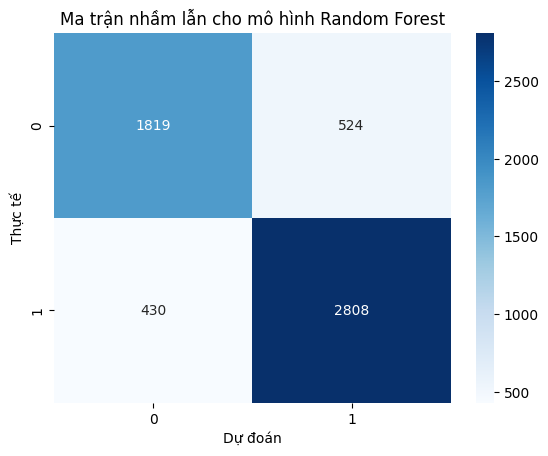

In [ ]:
rf_cm = confusion_matrix(y_test, y_rf_pred)
sns.heatmap(rf_cm, annot=True, fmt="d", cmap='Blues')
plt.title("Ma trận nhầm lẫn cho mô hình Random Forest")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

**Điểm chính xác (Accuracy Score)**

In [ ]:
rf_as = accuracy_score(y_true=y_test, y_pred=y_rf_pred)
print (f'Điểm chính xác của mô hình: {rf_as}')

Điểm chính xác của mô hình: 0.8290628919548468


**Kết luận: Dựa trên so sánh các đánh giá hiệu năng giữa hai mô hình, kết quả cho thấy sử dụng mô hình Logistic Regression sẽ hợp lý hơn**

## 6. Phát triển ứng dụng AI dự đoán khả năng một học sinh/sinh viên/người học có bị trầm cảm hay không

In [ ]:
# @title Nhập các thông tin về người học dưới đây
# @markdown Tuổi của người học
age = 20 # @param {"type":"number","placeholder":"Nhập tuổi của người học"}
# @markdown Điểm trung bình tích lũy (trên thang điểm 10)
cgpa = 8.0 # @param {"type":"number","placeholder":"Điểm trung bình tích lũy (thang điểm 10)"}
# @markdown Thành phố học tập hoặc sinh sống
city = "Ha Noi" # @param {"type":"string","placeholder":"Tên thành phố học tập"}
# @markdown Thời gian ngủ trung bình mỗi ngày
sleep_duration = 8 # @param {"type":"number","placeholder":"Thời gian ngủ trung bình một ngày"}
# @markdown Bằng cấp
degree = "Không" # @param {"type":"string","placeholder":"Bằng cấp"}
# @markdown Bạn đã từng suy nghĩ về tự tử không? (Có/Không)
suicidal_thoughts = "Có" # @param {"type":"string","placeholder":"Đã từng có suy nghĩ tự tử? (Có/Không)"}
# @markdown Thời gian học tập/làm việc trung bình mỗi ngày
work_study_hours = 8 # @param {"type":"number","placeholder":"Thời gian học hoặc làm việc trung bình một ngày"}
# @markdown Đánh giá mức độ lo lắng về tài chính (trên thang 5)
financial_stress = 2 # @param {"type":"slider","min":1,"max":5,"step":1}
# @markdown Gia đình bạn có tiền sử bị trầm cảm không? (Có/Không)
inherit_depression = "Không" # @param {"type":"string","placeholder":"Trong gia đình có tiền sử bị trầm cảm không? (Có/Không)"}
# @markdown Đánh giá mức độ áp lực về học tập/công việc (Từ 0 đến 5)
overall_pressure = 1 # @param {"type":"slider","min":0,"max":5,"step":0.5}
# @markdown Đánh giá mức độ hài lòng về học tập/công việc (Từ 0 đến 5)
overall_satisfaction = 3 # @param {"type":"slider","min":0,"max":5,"step":0.5}


In [ ]:
columns = ['Age','CGPA','City','Sleep Duration','Degree','Have you ever had suicidal thoughts ?','Work/Study Hours','Financial Stress','Family History of Mental Illness','Overall Pressure','Overall Satisfaction']
numerical_cols = ['Age','CGPA','Sleep Duration','Work/Study Hours','Financial Stress']
categorical_cols= ['City','Degree','Have you ever had suicidal thoughts ?','Family History of Mental Illness']

suicidal_thoughts = "No" if suicidal_thoughts == "Không" else "Yes"
inherit_depression = "No" if inherit_depression == "Không" else "Yes"

new_data = pd.DataFrame([[age, cgpa, city, sleep_duration, degree, suicidal_thoughts, work_study_hours, financial_stress, inherit_depression, overall_pressure, overall_satisfaction]], columns=columns)
# print(new_data.head())

new_data[numerical_cols] = numerical_scaler.transform(new_data[numerical_cols])
new_data = updated_categorical_encoder.transform(new_data)
new_data = new_data[X_train.columns]
new_data.fillna(-1, inplace=True)

result = logistic_model.predict(new_data)[0]
print(f'Dự đoán người có những đặc điểm trên có khả năng bị trầm cảm là: {"KHÔNG" if result == 0 else "CÓ"}')


Dự đoán người có những đặc điểm trên có khả năng bị trầm cảm là: KHÔNG
